## Final Project Submission

Please fill out:
* Student name: Tia Plagata
* Student pace: full time
* Scheduled project review date/time: 10/19 10am EST
* Instructor name: Rafael Carrasco
* Blog post URL:


# Data Cleaning #

**Outline**
* Handle nulls and dytpes
* Check for duplicates
* Check for nonsensical/placeholder values
* Deal with outliers
* Convert and save cleaned data

In [43]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open and preview data
df = pd.read_csv('/Users/jordanrjohnson/DataScienceCourseMaterial/phase_2/dsc-phase-2-project-online/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Handling Null Values and Data Types ##

In [5]:
# Check for nulls
print(df.shape)
df.isna().sum()

(21597, 21)


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# Handle nulls in 'Waterfront' column
print(df.waterfront.unique())
df.waterfront.value_counts()

[nan  0.  1.]


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [7]:
# Fill nulls with 0s (AKA not waterfront)
df['waterfront'] = df['waterfront'].fillna(value=0.0)

In [8]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [9]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [10]:
# Drop the 63 rows with null values in 'view' column
df = df.dropna(subset=['view'])

In [11]:
df['view'].isna().sum()

0

In [12]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
df.yr_renovated.value_counts()

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# Fill nulls with 0s (AKA not renovated)
df['yr_renovated'] = df['yr_renovated'].fillna(value=0.0)

In [15]:
df.yr_renovated.value_counts()

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
print(df.shape)
df.isna().sum()

(21534, 21)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [18]:
# For some reason, these are strings, and there's a ? in there...
df.sqft_basement.value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
1024.0        1
2720.0        1
1930.0        1
506.0         1
1960.0        1
Name: sqft_basement, Length: 302, dtype: int64

In [19]:
# Let's just assume a ? means there's no basement
df.loc[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [20]:
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

In [21]:
df.loc[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [22]:
# Convert to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [23]:
df['sqft_basement'].dtype

dtype('float64')

In [24]:
# Check other non-number dtype
df['date'].dtype

dtype('O')

In [25]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


## Checking for Duplicates ##

In [26]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


## Checking for Placeholder/Nonsensical Values ##

In [27]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,285.244311,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,439.334095,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
df.loc[df['bedrooms'] > 15]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [29]:
# Get rid of this crazy house with 33 bedrooms and 1 bathroom
df = df.loc[df['bedrooms'] < 15]

In [30]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153300e+04,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,4.582452e+09,5.400530e+05,3.371662,2.115729,2079.849208,1.509102e+04,1.494149,0.006734,0.233874,3.409650,7.657456,1788.592300,285.230623,1971.003390,68.869921,98077.938188,47.560174,-122.213943,1986.330423,12751.453397
std,2.876808e+09,3.660674e+05,0.904162,0.768616,917.462472,4.138112e+04,0.539808,0.081785,0.765702,0.650579,1.172661,827.749142,439.339704,29.376271,364.322710,53.507609,0.138529,0.140736,685.122310,27256.060980
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904950e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [31]:
# Bathrooms described as bathrooms per bedroom so 0.75 could make sense
df.loc[df['bathrooms'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
208,1222000055,2014-11-23,180250.0,2,0.75,900,9600,1.0,0.0,0.0,...,6,900,0.0,1941,0.0,98166,47.4604,-122.339,1250,14280
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
350,7325600160,2014-06-04,299000.0,1,0.75,560,12120,1.0,0.0,0.0,...,4,560,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
569,4045500710,2014-12-18,405000.0,2,0.75,1160,15029,1.0,0.0,0.0,...,6,870,290.0,1937,0.0,98014,47.6929,-121.870,1870,25346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19183,5016001619,2015-01-22,699999.0,3,0.75,1240,4000,1.0,0.0,0.0,...,7,1240,0.0,1968,0.0,98112,47.6239,-122.297,1460,4000
19329,2114700090,2015-03-01,151000.0,2,0.75,720,5040,1.0,0.0,0.0,...,4,720,0.0,1949,0.0,98106,47.5323,-122.347,1290,4120
20001,1025039168,2014-09-23,290000.0,1,0.75,740,1284,1.0,0.0,0.0,...,6,740,0.0,1928,0.0,98107,47.6741,-122.406,1430,3988
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


## Deal with Outliers ##

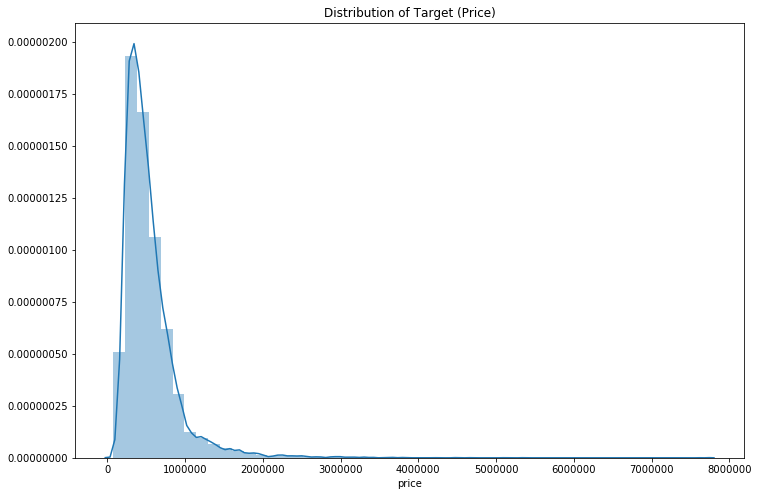

In [32]:
fig = plt.figure(figsize=(12,8))
sns.distplot(df['price'])
plt.title('Distribution of Target (Price)')
plt.show()

In [33]:
# Chop off major outliers over $1.5 million
df = df.loc[df['price'] < 1500000]
print(df.shape)

(21001, 21)


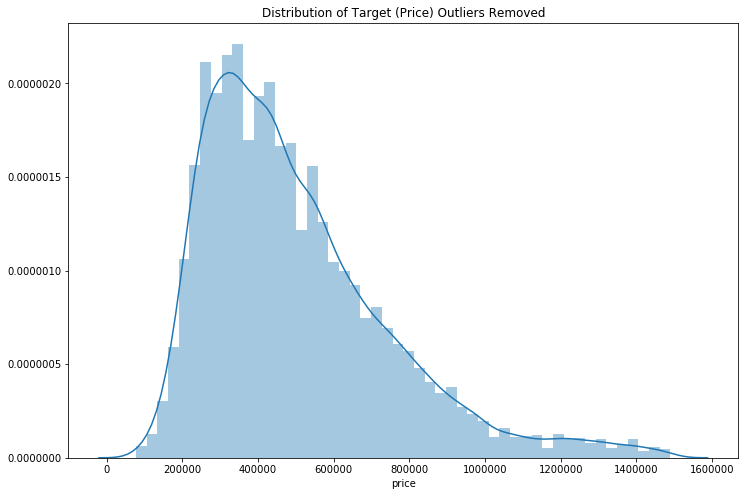

In [34]:
fig = plt.figure(figsize=(12,8))
sns.distplot(df['price'])
plt.title('Distribution of Target (Price) Outliers Removed')
plt.show()

In [35]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.100100e+04,2.100100e+04,21001.000000,21001.000000,21001.000000,2.100100e+04,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000,21001.000000
mean,4.594586e+09,5.005043e+05,3.350412,2.080484,2020.818771,1.471829e+04,1.485001,0.003476,0.199324,3.407362,7.590686,1742.773011,272.093472,1970.895005,64.525689,98078.400171,47.558732,-122.213660,1952.893862,12537.047045
std,2.878560e+09,2.466374e+05,0.893690,0.730293,822.499507,3.989018e+04,0.537976,0.058857,0.695141,0.648295,1.093085,760.687637,419.175063,29.283766,353.025246,53.395885,0.139711,0.141662,647.074773,26476.907297
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125059e+09,3.199500e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.466000,-122.330000,1480.000000,5074.000000
50%,3.905041e+09,4.450000e+05,3.000000,2.250000,1890.000000,7.552000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.569500,-122.231000,1820.000000,7562.000000
75%,7.334600e+09,6.250000e+05,4.000000,2.500000,2490.000000,1.045400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,520.000000,1996.000000,0.000000,98118.000000,47.679000,-122.124000,2320.000000,9990.000000
max,9.900000e+09,1.490000e+06,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7320.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [37]:
df_inter = df.loc[(df['price'] >= 100000) &
                   (df['price'] <= 1000000)]
print(df_inter.shape)
df_inter.head()

(20057, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [38]:
df_inter.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.005700e+04,20057.000000,20057.000000,20057.000000,20057.000000,2.005700e+04,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000,20057.000000
mean,4.612490e+09,468407.951488,3.322780,2.040784,1956.920227,1.449592e+04,1.471905,0.002493,0.162487,3.405943,7.507902,1694.004088,257.267538,1970.764072,59.686444,98078.552475,47.556154,-122.213227,1909.252929,12367.800917
std,2.878327e+09,196200.335845,0.882121,0.702034,755.036727,3.993528e+04,0.536507,0.049868,0.620319,0.645348,1.010392,711.374154,401.268064,29.114782,339.909884,53.278017,0.141633,0.142488,600.800903,26390.951370
min,1.000102e+06,100000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.141301e+09,315000.000000,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.457900,-122.330000,1460.000000,5040.000000
50%,3.918400e+09,435000.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1974.000000,0.000000,98065.000000,47.566000,-122.232000,1790.000000,7529.000000
75%,7.345000e+09,594491.000000,4.000000,2.500000,2410.000000,1.026000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2080.000000,500.000000,1996.000000,0.000000,98118.000000,47.680200,-122.122000,2260.000000,9834.000000
max,9.900000e+09,1000000.000000,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000


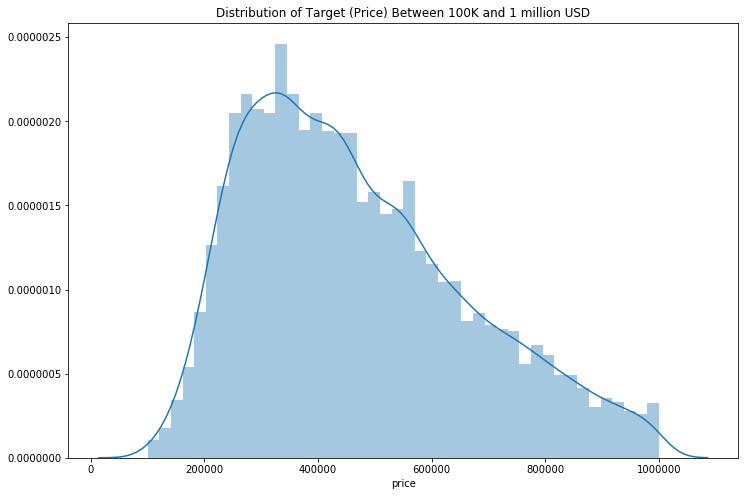

In [39]:
fig = plt.figure(figsize=(12,8))
sns.distplot(df_inter['price'])
plt.title('Distribution of Target (Price) Between 100K and 1 million USD')
plt.show()

## Convert and Save to CSV ##

In [42]:
df_inter.to_csv('/Users/jordanrjohnson/DataScienceCourseMaterial/phase_2/dsc-phase-2-project-online/data/kc_house_data_cleaned.csv', index=False)